In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
impossible_values = (df["Glucose"] == 0) | (df["BloodPressure"] == 0) | (df["SkinThickness"] == 0) | (df["Insulin"] == 0) | (df["BMI"] == 0)
impossible_values.sum()

376

In [7]:
import numpy as np

lst=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in lst:
    df[i].replace(0, np.nan, inplace=True)
    df[i].fillna(df[i].median(), inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


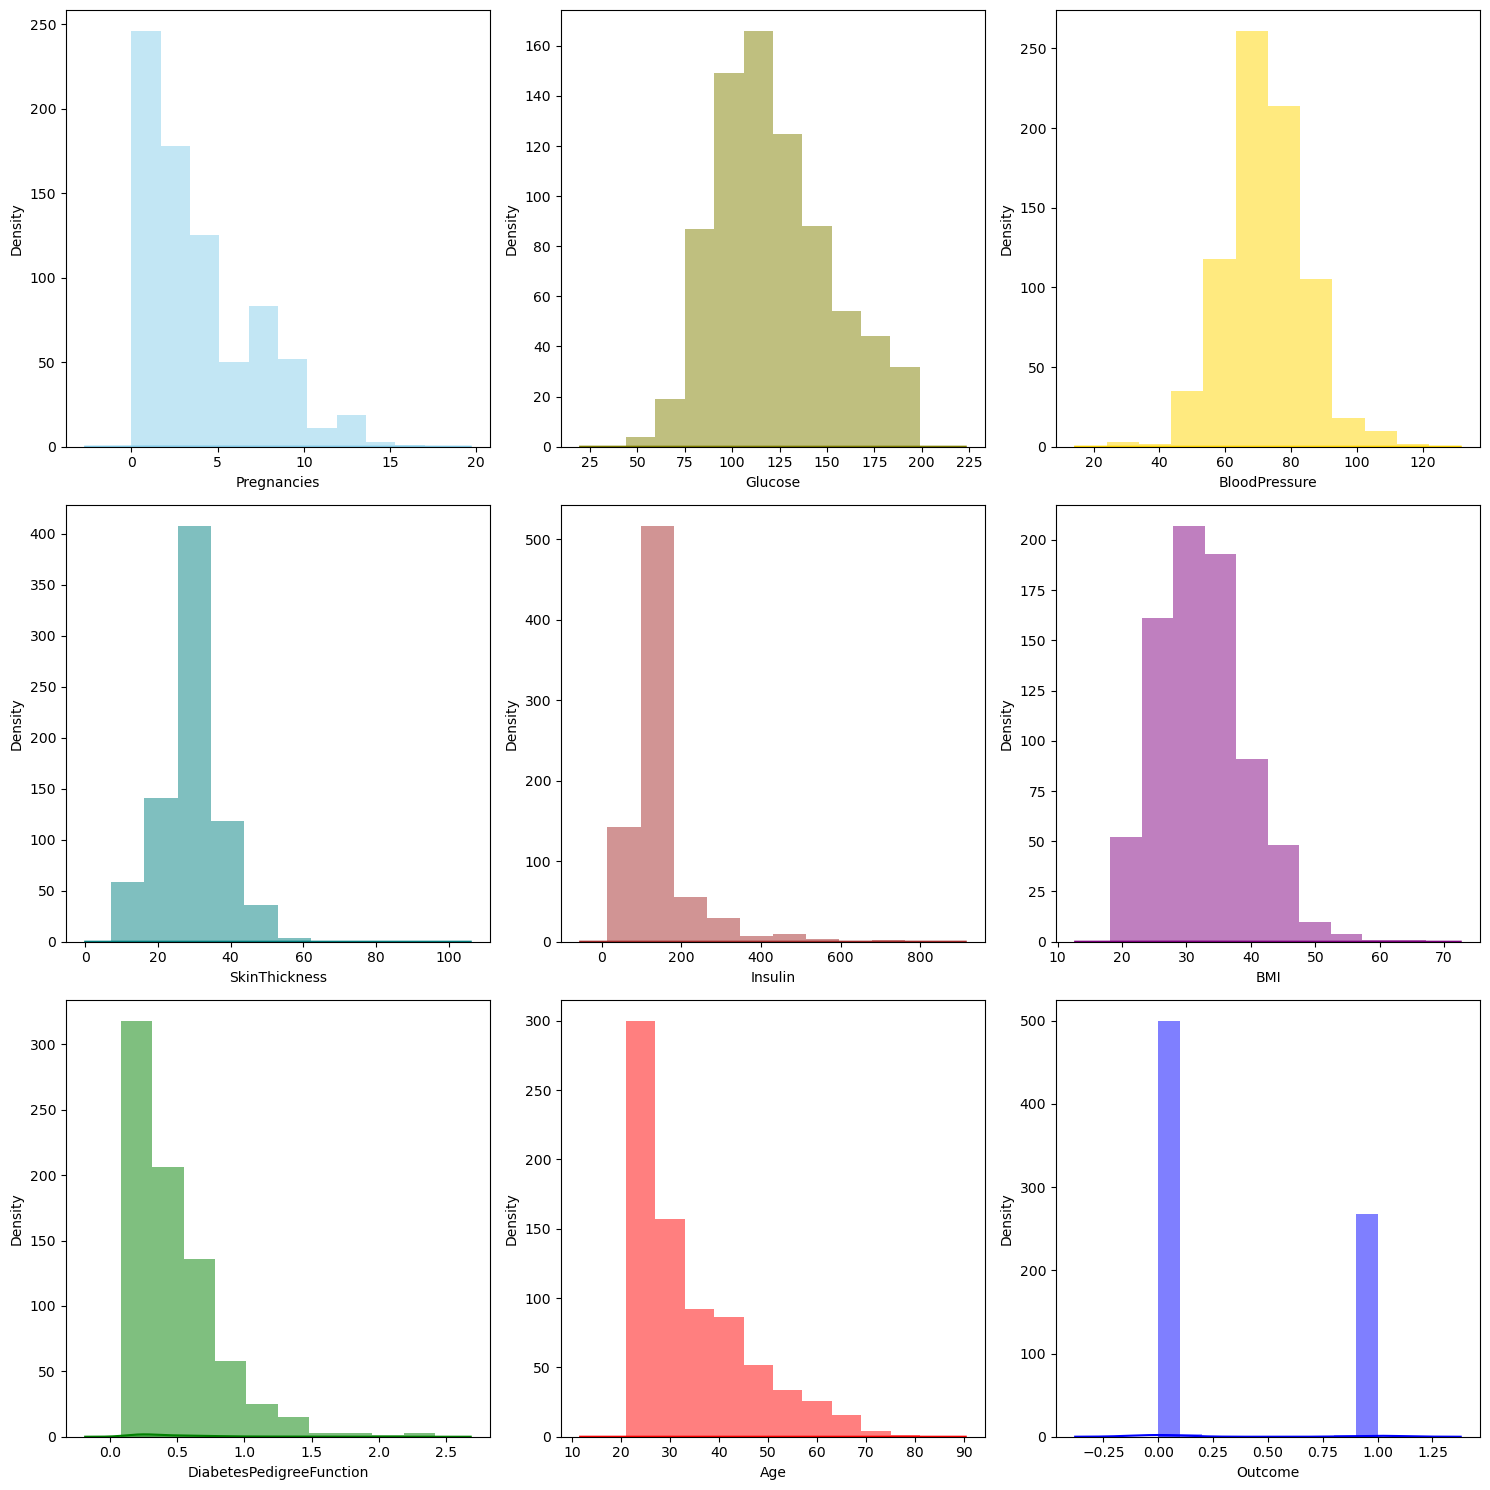

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
lst1=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
lst_col=['skyblue','olive','gold','teal','brown','purple','green','red','blue']
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False) 
axes = axes.flatten() 
for ax,k,m in zip(axes,lst1,lst_col):
    ax.hist(df[k], color=m, bins=10, alpha=0.5)
    sns.distplot(df[k], color=m, ax=ax)
plt.tight_layout() 

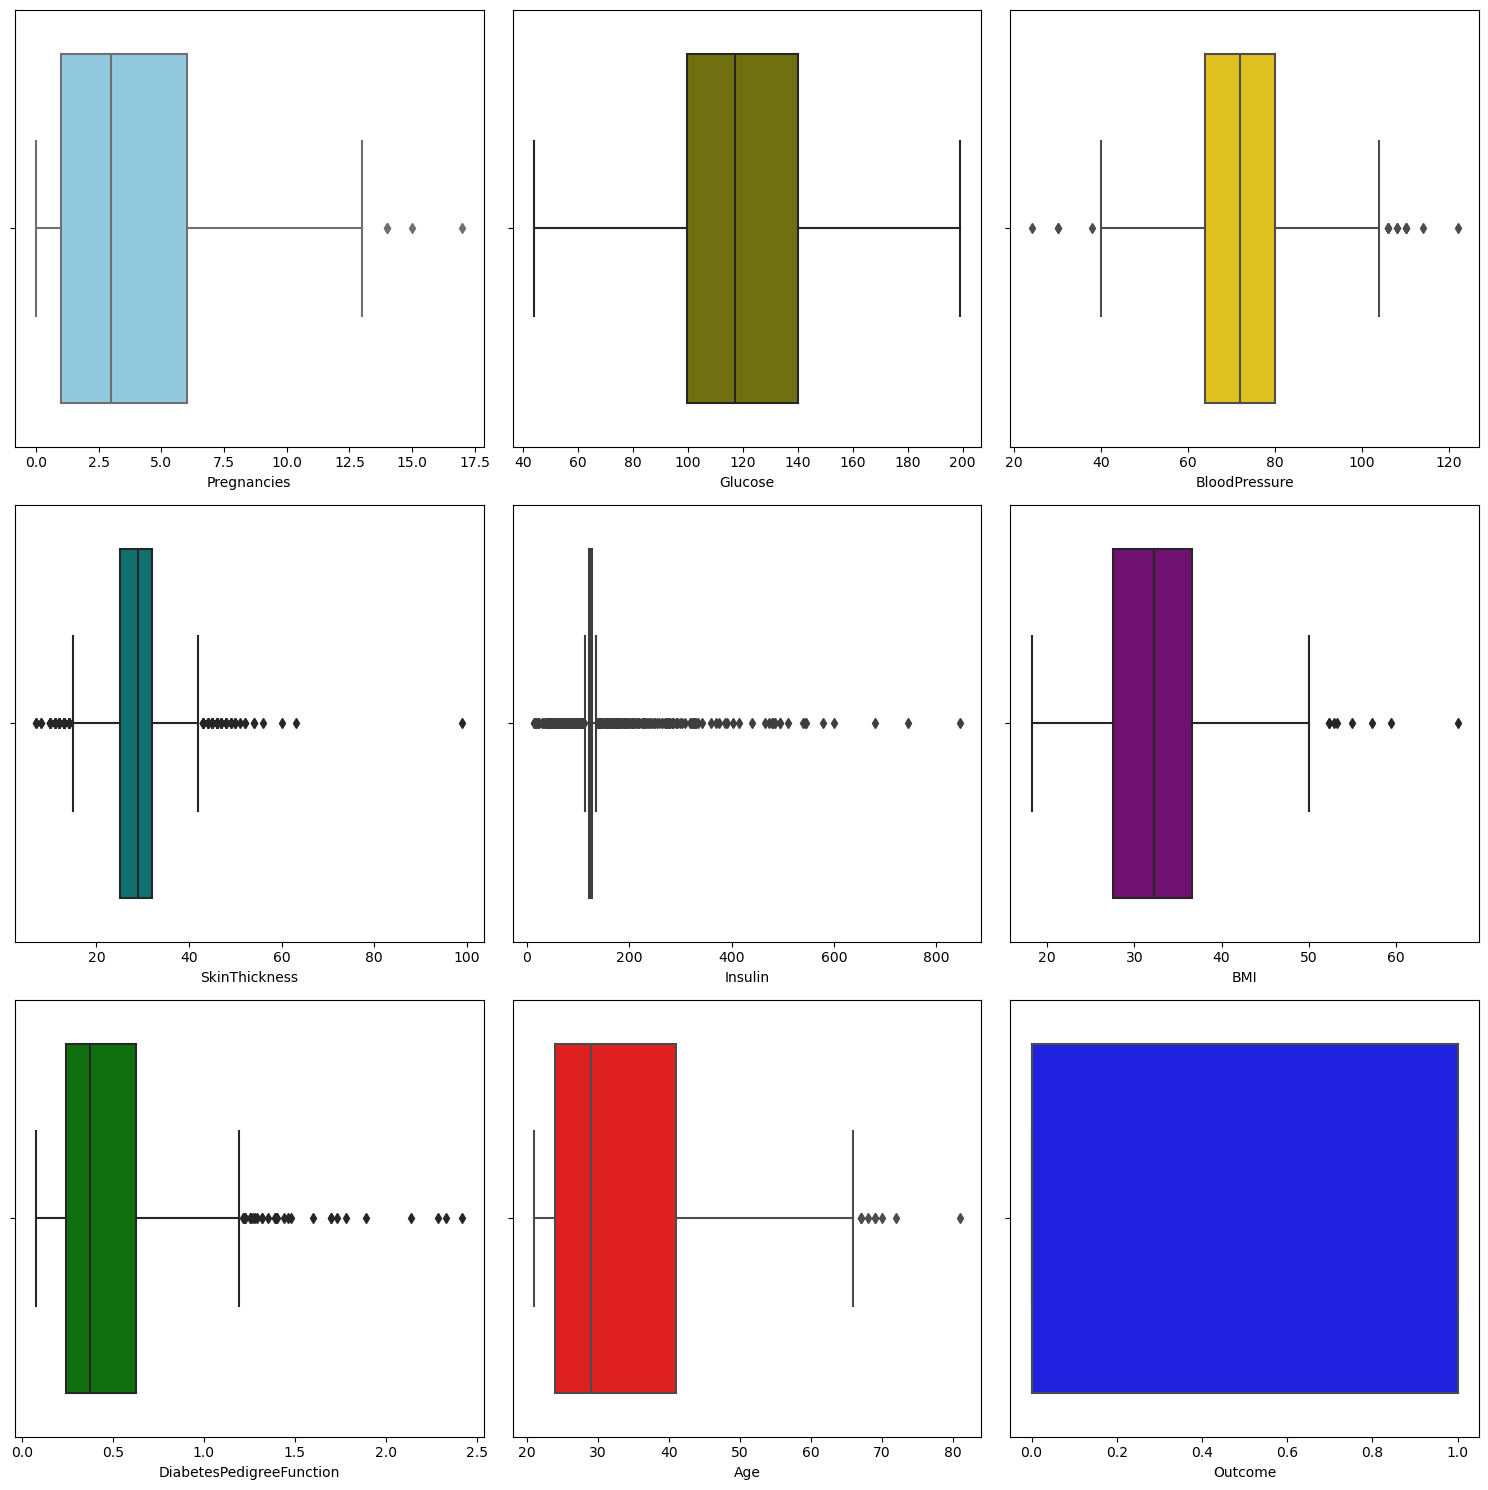

In [9]:
lst1=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
lst_col=['skyblue','olive','gold','teal','brown','purple','green','red','blue']
f, axes = plt.subplots(3, 3, figsize=(15, 15), sharex=False) 
axes = axes.flatten()  
for ax,k,m in zip(axes,lst1,lst_col):
    sns.boxplot(data=df, x=k, color=m, ax=ax)
plt.tight_layout()  
plt.show()

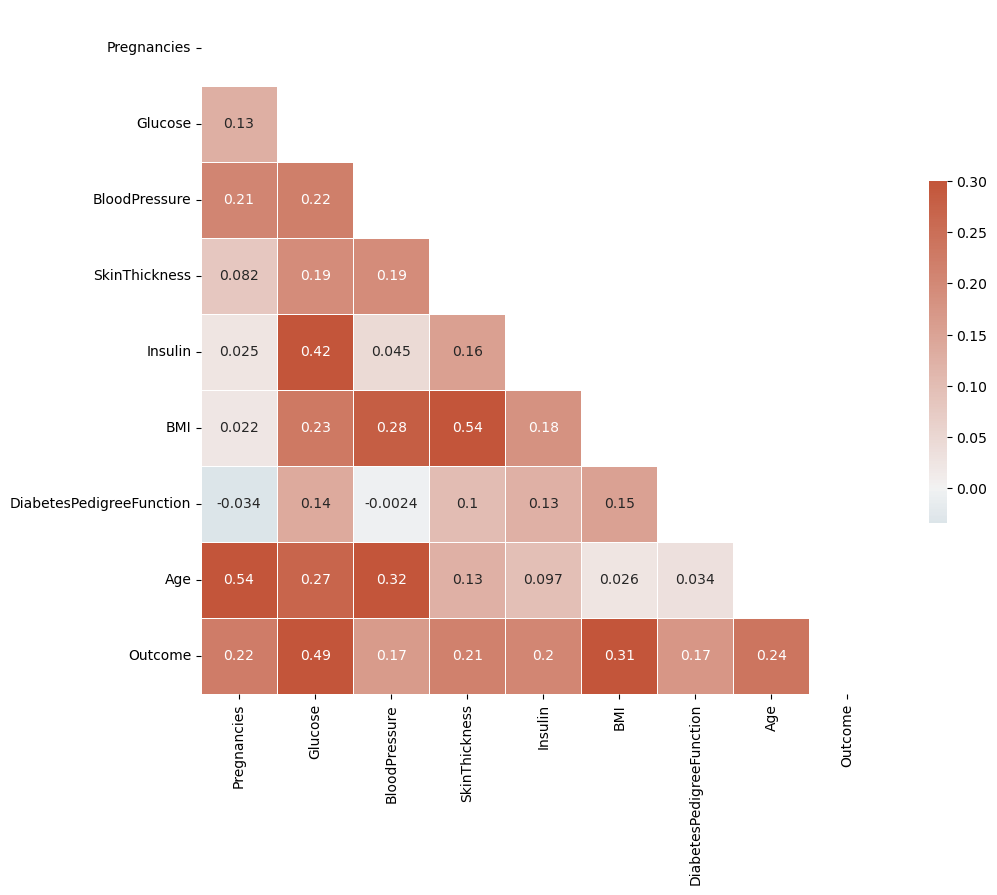

In [10]:
corr = df.corr() 
mask = np.triu(np.ones_like(corr, dtype=bool)) 
f, ax = plt.subplots(figsize=(11, 9)) 
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True) # Draw the heatmap with the mask and correct aspect ratio
plt.tight_layout()

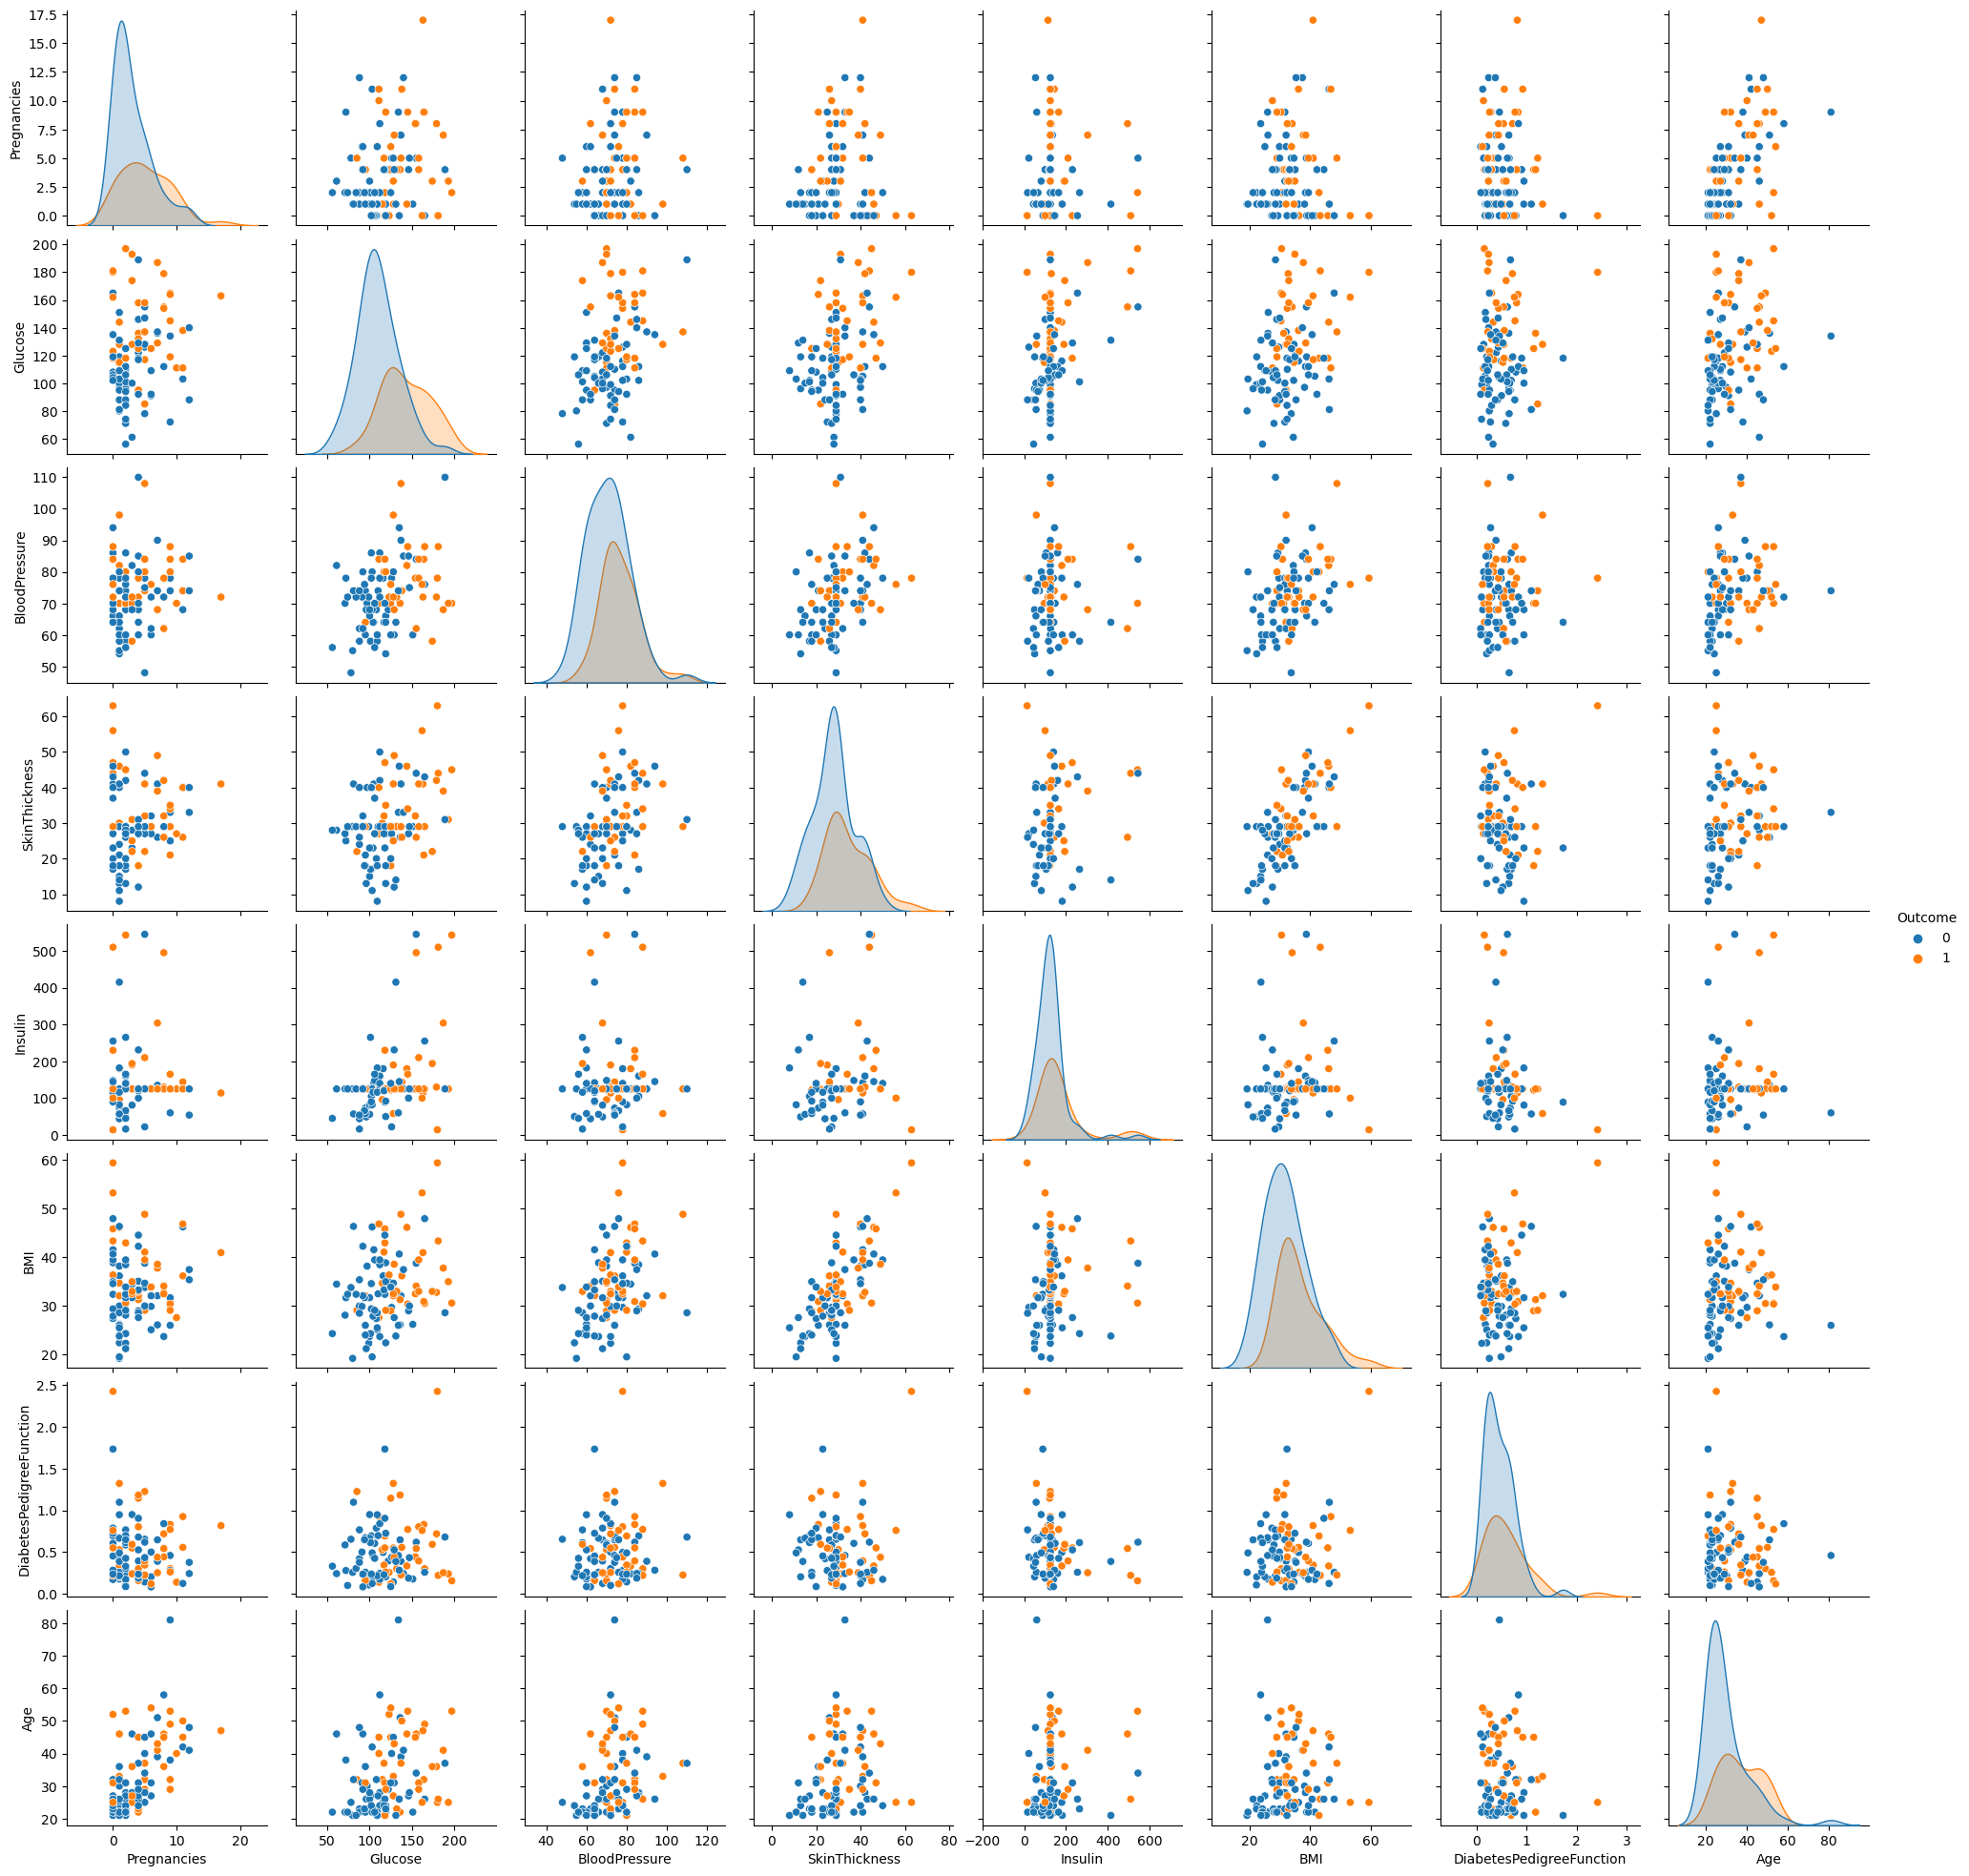

In [11]:
df_sample = df.sample(100, random_state=1)


sns.pairplot(df_sample, hue="Outcome")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((614, 8), (154, 8))

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
def fit_and_evaluate(model):
    model.fit(X_train_scaled, y_train)  
    train_preds = model.predict(X_train_scaled) 
    train_acc = accuracy_score(y_train, train_preds)
    test_preds = model.predict(X_test_scaled) 
    test_acc = accuracy_score(y_test, test_preds)
    return train_acc, test_acc
res=[]
models=[LogisticRegression(random_state=42),DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),SVC(random_state=42)]
for i in models:
    res.append(fit_and_evaluate(i))
for mod,result in zip(models,res):
    print(f'train and test accuracy of {mod} respectively is: \n {result} \n \n')


train and test accuracy of LogisticRegression(random_state=42) respectively is: 
 (0.7703583061889251, 0.7532467532467533) 
 

train and test accuracy of DecisionTreeClassifier(random_state=42) respectively is: 
 (1.0, 0.7207792207792207) 
 

train and test accuracy of RandomForestClassifier(random_state=42) respectively is: 
 (1.0, 0.7337662337662337) 
 

train and test accuracy of SVC(random_state=42) respectively is: 
 (0.8289902280130294, 0.7467532467532467) 
 

